In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle



In [2]:
import pandas as pd
import numpy as np

hypothalamus_path = 'hypothalamus.txt'
liver_path = 'liver.txt'
genotypes_path = 'BXD.geno'

hypothalamus_expression_df = pd.read_csv(hypothalamus_path,
                                         sep='\t',
                                         comment='#',
                                         index_col=0,
                                         )
liver_expression_df = pd.read_csv(liver_path,
                                         sep='\t',
                                         comment='#',
                                         index_col=0,
                                         )
#hypothalamus_expression_df.columns = hypothalamus_expression_df.iloc[0]
hypothalamus_expression_df = hypothalamus_expression_df[1:]
liver_expression_df = liver_expression_df[1:]

/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,

In [3]:
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df.iloc[33:,:]
hypothalamus_expression_df_no_metadata

,BXD44_F,BXD49_M,BXD44_M,BXD102_M,BXD43_M,BXD45_F,BXD45_M,BXD103_M,BXD103_F,BXD60_F,...,BXD92A_F,BXD70_F,BXD92A_M,BXD68_F,BXD68_M,BXD79_F,BXD85_F,BXD85_M,BXD101_M,BXD101_F
!Sample_title,,,,,,,,,,,,,,,,,,,,,
10338001,12.612,12.509,12.629,12.56,12.533,12.646,12.426,12.465,12.728,12.429,...,12.451,12.812,12.757,12.697,12.943,12.622,12.963,12.522,12.558,12.872
10338003,11.187,11.043,11.116,11.104,11.09,11.151,10.955,11.06,11.256,10.968,...,10.975,11.304,11.207,11.246,11.445,11.15,11.539,10.98,11.093,11.314
10338004,10.021,9.627,9.875,9.817,10.031,9.906,9.766,9.881,10.064,9.78,...,9.83,9.929,9.972,9.929,10.065,9.772,9.973,9.926,9.799,10.021
10338017,13.598,13.342,13.509,13.518,13.495,13.516,13.4,13.42,13.594,13.385,...,13.562,13.723,13.667,13.543,13.811,13.482,13.651,13.559,13.575,13.827
10338025,9.937,9.654,9.743,9.868,9.854,9.866,9.719,9.799,9.948,9.875,...,9.866,10,9.892,10.007,10.092,9.809,10.074,9.828,9.967,10.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10608720,9,9.033,9.154,8.93,9.274,8.834,9.065,9.121,9.103,9.127,...,9.085,9.136,9.199,9.265,9.126,9.092,9.342,8.994,9.025,9.337
10608721,9.121,9.608,9.108,9.218,8.926,9.228,9.177,9.078,9.042,9.082,...,9.09,9.185,8.891,9.319,9.483,9.093,8.923,9.135,9.028,8.967
10608722,5.691,5.466,5.591,5.674,5.831,5.541,5.618,5.604,5.553,5.504,...,5.522,5.379,5.525,5.573,5.323,5.61,5.621,5.657,5.591,5.336


In [36]:
# liver_expression_df = liver_expression_df.loc[hypothalamus_expression_df.loc[hypothalamus_expression_df.apply(lambda row: type(row.name) != int, axis = 1)]]

liver_expression_df_no_metadata = liver_expression_df.iloc[46:-1,:]


In [37]:
# Set minimal maximal expression value to be the .025 percentile of all maximal values

# Liver data 
liver_expression_df_no_metadata = liver_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = liver_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = liver_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
liver_expression_df_no_metadata = liver_expression_df_no_metadata.loc[mask]

# Hypo data
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]




In [38]:
# Set minimal expression variance per row to be the .1 percentile of all variance values

# Liver data 
print(liver_expression_df_no_metadata.shape)
thr = liver_expression_df_no_metadata.var(axis = 1).quantile(.1)
mask = liver_expression_df_no_metadata.apply(lambda row: row.var() > thr, axis = 1)
liver_expression_df_no_metadata = liver_expression_df_no_metadata.loc[mask]
print(liver_expression_df_no_metadata.shape)
'''
# Hypo data
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]

'''


(20346, 122)
(18311, 122)


'\n# Hypo data\nhypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))\nthr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)\nmask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)\nhypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]\n\n'

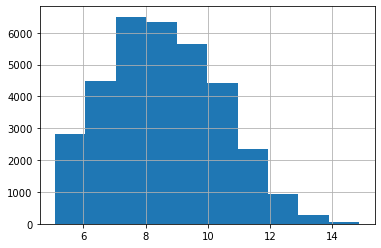

In [7]:
hypothalamus_expression_df_no_metadata.max(axis = 1).hist()

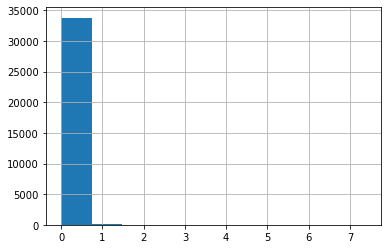

In [9]:
hypothalamus_expression_df_no_metadata.var(axis = 1).hist()

In [16]:
thr = hypothalamus_expression_df_no_metadata.var(axis = 1).quantile(.1)

0.010018711797752818

(0.0, 0.1)

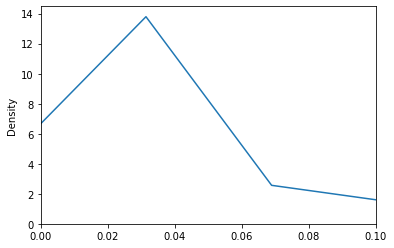

In [19]:
sns.kdeplot(data=hypothalamus_expression_df_no_metadata.var(axis = 1)).set_xlim([0,.1])

In [20]:
hypothalamus_expression_df_no_metadata.shape

(33890, 89)

###  Load regression results

In [2]:
ls

BXD.geno          drors_work.ipynb  liver_eqtl.pkl    preprocessing.py
__pycache__/      hypothalamus.txt  main.py
docs/             liver.txt         phenotypes.xls


In [6]:

res = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')

In [11]:
with open('bin/liver_eqtl.pkl','rb') as f:
    liver_eqtl_results = pickle.load(f)

In [10]:
liver_eqtl_results

AttributeError: 'DataFrame' object has no attribute '_data'

In [12]:
type(res)

pandas.core.frame.DataFrame

In [23]:
res = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')

In [24]:
res.head(5)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [27]:
import sys
sys.getrecursionlimit()

3000

### Q4 - QTL analysis of all snps against all phenotypes

As in assignment 2, run genome wide association test on
each of the selected phenotypes. Each significantly associated SNP is called QTL.
Discuss the statistical significance of the identified QTLs. Pay attention to
multiple testing correction

In [14]:
phenotypes =  pd.read_csv('data/phenotypes_filtered_df.csv')
genotypes = pd.read_csv('data/genotypes_preproc_numeric_df.csv')

In [21]:
phenotypes

,Phenotype,C57BL/6J,DBA/2J,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
0,"Ethanol response (10% v/v in water), acceptanc...",0.750,0.290,0.440,NaN,1.090,0.070,0.530,NaN,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Ethanol response (10% v/v in water), acceptanc...",12.600,3.360,3.520,NaN,9.950,1.320,10.890,NaN,13.340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Saline response (saline injection ip), open fi...",155.000,132.000,175.000,182.000,240.000,152.000,113.000,NaN,79.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ethanol response (2.5 g/kg ip), distance run i...",83.000,335.000,264.000,155.000,178.000,144.000,171.000,NaN,133.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ethanol response (1.33 g/kg ip), open field ac...",-72.000,203.000,89.000,-27.000,-62.000,-8.000,58.000,NaN,54.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"Anxiety assay (E10_PTS), restraint stress (15 ...",38.627,31.226,46.442,58.510,40.138,46.542,29.810,26.386,28.708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,"Anxiety assay (E10_TS), restraint stress (15 m...",231.762,187.354,278.650,351.062,240.829,279.250,178.863,158.317,172.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Anxiety assay (E10_TR), restraint stress (15 m...",99.987,73.246,73.975,163.050,171.686,98.412,61.575,64.317,75.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,"Anxiety assay (E10_PTR), restraint stress (15 ...",33.329,24.415,24.658,54.350,57.229,32.804,20.525,21.439,25.133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
genotypes

,Locus,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,...,BXD91,BXD92,BXD93,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100
0,rs6269442,0,0,2,2,2,0,0,2,0,...,2,2,0,2,2,0,0,0,0,0
1,rs6376963,0,0,2,2,2,0,0,2,0,...,2,2,0,2,2,0,0,0,0,0
2,rs3677817,0,0,2,2,2,0,0,2,0,...,2,2,0,2,2,0,0,0,0,0
3,rs8236463,0,0,2,2,2,0,2,2,0,...,2,2,0,2,2,0,0,0,0,0
4,rs6298633,0,0,2,2,2,0,2,2,0,...,2,2,0,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,CEL-X_154048891,0,0,0,0,0,0,0,0,2,...,0,0,2,2,1,0,0,2,2,0
2323,CEL-X_154259201,0,0,0,2,0,0,0,0,2,...,0,0,2,2,1,0,0,2,2,0
2324,rs3657281,0,0,0,2,0,0,0,0,2,...,0,0,2,2,1,0,0,2,2,0
2325,gnfX.146.867,0,0,0,2,0,0,0,0,2,...,0,2,2,2,1,0,0,2,2,0


In [22]:

# A regressor function to apply on each row (snp) from the data, y is fixed - it's the same phenotype always.
def regress(x, y):
    x = x.dropna()
    y = y[x.index]
    return stats.linregress(x, y)

In [24]:
# This genotypes preprocessed file is already encoded and there are no NaNs in it.
genotypes.isna().sum().sum()

# Filter out hetrozygous samples and encode genotypes as either 1 or 2.
mask = genotypes == 1
genotypes_homozygous = genotypes[~mask]


In [71]:
phenotypes

,Phenotype,C57BL/6J,DBA/2J,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
0,"Ethanol response (10% v/v in water), acceptanc...",0.750,0.290,0.440,NaN,1.090,0.070,0.530,NaN,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Ethanol response (10% v/v in water), acceptanc...",12.600,3.360,3.520,NaN,9.950,1.320,10.890,NaN,13.340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Saline response (saline injection ip), open fi...",155.000,132.000,175.000,182.000,240.000,152.000,113.000,NaN,79.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ethanol response (2.5 g/kg ip), distance run i...",83.000,335.000,264.000,155.000,178.000,144.000,171.000,NaN,133.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ethanol response (1.33 g/kg ip), open field ac...",-72.000,203.000,89.000,-27.000,-62.000,-8.000,58.000,NaN,54.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"Anxiety assay (E10_PTS), restraint stress (15 ...",38.627,31.226,46.442,58.510,40.138,46.542,29.810,26.386,28.708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,"Anxiety assay (E10_TS), restraint stress (15 m...",231.762,187.354,278.650,351.062,240.829,279.250,178.863,158.317,172.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Anxiety assay (E10_TR), restraint stress (15 m...",99.987,73.246,73.975,163.050,171.686,98.412,61.575,64.317,75.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,"Anxiety assay (E10_PTR), restraint stress (15 ...",33.329,24.415,24.658,54.350,57.229,32.804,20.525,21.439,25.133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def regress_single_genotype_to_single_phenotype(x, y):
#     print(y)
#     print(y.name)
    print(x.index)
    print(np.intersection(y.name, x.index.values))
#     print(X, y)

def regress_single_genotype_on_phenotypes(single_genotype, phenotypes_df):
#     print(single_genotype)
    phenotypes_df.apply(lambda pheno: regress_single_genotype_to_single_phenotype(single_genotype, pheno))

#     print(phenotypes_df.head)
#     print(single_genotype)

In [138]:
# phenotypes = phenotypes.set_index('Phenotype')
# genotypes_homozygous = genotypes_homozygous.set_index('Locus')
from scipy.stats import f
from scipy import stats

pheno_vs_geno_df = pd.DataFrame(index = genotypes_homozygous.index, columns = phenotypes.index)
# print(pheno_vs_geno_df)
for _, pheno in phenotypes.iterrows():
    y = pheno
    y = y.dropna()
    common = genotypes_homozygous.columns.intersection(y.index)
    y = y[common]
    X = genotypes_homozygous[common]
    reg_models = X.apply(lambda x: stats.linregress(x, y), axis = 1)
    pvals = reg_models.apply(lambda model: model.pvalue)
#     pvals = reg_models.apply(lambda model: -np.log10(model.pvalue))

    pheno_vs_geno_df[pheno.name] = pvals





# Extract pvalues and -log10 transform. Output results to txt

# pvals.to_csv('hw2_log_pvals.txt', sep='\n', index=False, header=False)

#     genotypes_homozygous.apply(l)
#     print(pheno)

/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [139]:
pheno_vs_geno_df

Phenotype,"Ethanol response (10% v/v in water), acceptance of ethanol under thirst motivation in a single-bottle (no choice) test following 24 hr water deprivation, total 24 hr ethanol intake relative to previous water intake in 20-24 week-old males [ratio]","Ethanol response (10% v/v in water), acceptance of ethanol under thirst motivation in a single-bottle (no choice) test following 24 hr water deprivation, total 24 hr ethanol intake in 20-24 week-old males [g/kg]","Saline response (saline injection ip), open field activity in 20-24 week-old males (control for ethanol trait 10077) [beam crossings]","Ethanol response (2.5 g/kg ip), distance run in the grid test, 10-12 min after injection in 20-24 week-old males [n beam crossings]","Ethanol response (1.33 g/kg ip), open field activity in 20-24 week-old males tested under dim light, 10-13 min after injection of saline (day 1) and ethanol (day 2), difference in number of beam crossings relative to saline control injection [n]","Ethanol response (2.5 g/kg ip), ataxia on grid test, 10 to 12 min after injection in 24-28 week-old males, foot fall errors/distance run in the apparatus [n/distance]","Ethanol response (3 day exposure to 8-11 g/kg ethanol in vapor chamber with pyrazole 1 mM/kg/day),handling-induced convulsion (HIC) withdrawal severity score (15x 1 hour measurements) in 24-28 week-old males, first experimental replication (Table 4) [area","Ethanol response (3 day exposure to 8-11 g/kg ethanol in vapor chamber with pyrazole 1 mM/kg/day),handling-induced convulsion (HIC) withdrawal severity score (15x 1 hour measurements) in 24-28 week-old males, second experimental replication (Table 4) [are","Ethanol response (3 day exposure to 8-11 g/kg ethanol in vapor chamber with pyrazole 1 mM/kg/day),handling-induced convulsion (HIC) withdrawal severity score (15x 1 hour measurements) in 24-28 week-old males, third experimental replication (Table 4) [area","Ethanol response (2 mg/kg ip), acute difference in locomotion between experimental ethanol-condidtioned and saline control group of males [activity counts/min]",...,"Anxiety assay (E5_PTR), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p), percent time spent (sec) without locomotion in the light side of light-dark box in 8-12 week-old males during 5 min session [n %].","Anxiety assay (E5_PTS), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), percent time spent in light side (sec) using a light-dark box in 8-12 week-old males during 5 min session [n %].","Anxiety assay (E5_TR), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), time spent without locomotion in the light side of light-dark box in 8-12 week-old males during 5 min session [n sec].","Anxiety assay (E5_TS), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), time spent in light side using a light-dark box in 8-12 week-old males during 5 min [n sec].","Anxiety assay (E5_NR), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), number of rears in the light side using a light-dark box in 8-12 week-old males during 5 min session [n beam breaks].","Anxiety assay (E10_PTS), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), percent time spent in light side (sec) using a light-dark box in 8-12 week-old males during 10 min session [n %].","Anxiety assay (E10_TS), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), time spent in light side using a light-dark box in 8-12 week-old males during 10 min [n sec].","Anxiety assay (E10_TR), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), time spent without locomotion in the light side of light-dark box in 8-12 week-old males during 10 min session [n sec].","Anxiety assay (E10_PTR), restraint stress (15 min) + ethanol treated (1.8 g/kg i.p.), percent time spent (sec) without locomotion in the light side of light-dark box in 8-12 week-old males during 10 min session [n %].","Ethanol response (3 day exposure to 8-11 g/kg ethanol in vapor chamber with pyrazole

In [142]:
pd.wide_to_long(df=pheno_vs_geno_df, stubnames=pheno_vs_geno_df.columns)

TypeError: wide_to_long() missing 2 required positional arguments: 'i' and 'j'

In [106]:
genotypes_homozygous[common]

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD91,BXD92,BXD93,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,0,0,2,2,2,0,0,2,0,0,...,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
rs6376963,0,0,2,2,2,0,0,2,0,0,...,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
rs3677817,0,0,2,2,2,0,0,2,0,0,...,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
rs8236463,0,0,2,2,2,0,2,2,0,0,...,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
rs6298633,0,0,2,2,2,0,2,2,0,0,...,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154048891,0,0,0,0,0,0,0,0,2,0,...,0.0,0.0,2.0,2.0,NaN,0.0,0.0,2.0,2.0,0.0
CEL-X_154259201,0,0,0,2,0,0,0,0,2,0,...,0.0,0.0,2.0,2.0,NaN,0.0,0.0,2.0,2.0,0.0
rs3657281,0,0,0,2,0,0,0,0,2,0,...,0.0,0.0,2.0,2.0,NaN,0.0,0.0,2.0,2.0,0.0


In [96]:
mask = genotypes_homozygous[y.index.isin(genotypes_homozygous.columns)]
mask 
# genotypes_homozygous.iloc[0:2,:][y.index]

ValueError: Item wrong length 94 instead of 2327.

In [86]:
# phenotypes = phenotypes.set_index('Phenotype')

genotypes_homozygous.iloc[0:2,:].apply(lambda x: regress_single_genotype_on_phenotypes(x, phenotypes), axis = 1)

Index(['Locus', 'BXD1', 'BXD2', 'BXD5', 'BXD6', 'BXD8', 'BXD9', 'BXD11',
       'BXD12', 'BXD13', 'BXD14', 'BXD15', 'BXD16', 'BXD18', 'BXD19', 'BXD20',
       'BXD21', 'BXD22', 'BXD23', 'BXD24', 'BXD25', 'BXD27', 'BXD28', 'BXD29',
       'BXD30', 'BXD31', 'BXD32', 'BXD33', 'BXD34', 'BXD35', 'BXD36', 'BXD37',
       'BXD38', 'BXD39', 'BXD40', 'BXD41', 'BXD42', 'BXD43', 'BXD44', 'BXD45',
       'BXD48', 'BXD49', 'BXD50', 'BXD51', 'BXD52', 'BXD53', 'BXD54', 'BXD55',
       'BXD56', 'BXD59', 'BXD60', 'BXD61', 'BXD62', 'BXD63', 'BXD64', 'BXD65',
       'BXD66', 'BXD67', 'BXD68', 'BXD69', 'BXD70', 'BXD71', 'BXD72', 'BXD73',
       'BXD74', 'BXD75', 'BXD76', 'BXD77', 'BXD78', 'BXD79', 'BXD80', 'BXD81',
       'BXD83', 'BXD84', 'BXD85', 'BXD86', 'BXD87', 'BXD88', 'BXD89', 'BXD90',
       'BXD91', 'BXD92', 'BXD93', 'BXD94', 'BXD95', 'BXD96', 'BXD97', 'BXD98',
       'BXD99', 'BXD100'],
      dtype='object')


AttributeError: module 'numpy' has no attribute 'intersection'

In [34]:
for id_y, pheno in phenotypes.iterrows():
    for id_x, geno in genotypes_homozygous.iterrows():
#         print(geno.name.intersection(pheno.name.intersection))


        print(geno.values)
#         print(pheno)
#         common = np
        break
    break

['rs6269442' 0 0 2 2 2 0 0 2 0 0 2 2 0 2 2 2 2 0 0 2.0 0 2.0 2 0.0 0 0 0
 0.0 0 0.0 0 0.0 2 0 2.0 0 0.0 2.0 0.0 0.0 nan nan 0.0 2.0 0.0 0.0 nan nan
 0.0 0.0 2.0 2.0 2.0 2.0 2.0 0.0 0.0 nan 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0
 2.0 2.0 2.0 2.0 2.0 nan 0.0 2.0 2.0 0.0 2.0 0.0 0.0 2.0 2.0 0.0 2.0 2.0
 0.0 0.0 0.0 0.0 0.0]


In [25]:

models = genotypes_homozygous.apply(lambda x: regress(x, phenotypes), axis = 1)
# encoding = {'D': 0, 'B': 1, 'H':np.nan} 
# geno_df_encoded = geno_df_no_nans.applymap(lambda val: encoding.get(val, np.nan))

KeyError: "['Locus'] not in index"

In [12]:
# A regressor function to apply on each row (snp) from the data, y is fixed - it's the same phenotype always.
def regress(x, y):
    x = x.dropna()
    y = y[x.index]
    return stats.linregress(x, y)



,Locus,0,Chr_Build37,Build37_position,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,...,BXD91,BXD92,BXD93,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100
0,rs6269442,1,1,3482276,B,B,D,D,D,B,...,D,D,B,D,D,B,B,B,B,B
1,rs6376963,3,1,5008090,B,B,D,D,D,B,...,D,D,B,D,D,B,B,B,B,B
2,rs3677817,4,1,5176059,B,B,D,D,D,B,...,D,D,B,D,D,B,B,B,B,B
3,rs8236463,5,1,5579194,B,B,D,D,D,B,...,D,D,B,D,D,B,B,B,B,B
4,rs6298633,7,1,6820242,B,B,D,D,D,B,...,D,D,B,D,D,B,B,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,CEL-X_154048891,3791,20,160516970,B,B,B,B,B,B,...,B,B,D,D,H,B,B,D,D,B
2323,CEL-X_154259201,3792,20,160727280,B,B,B,D,B,B,...,B,B,D,D,H,B,B,D,D,B
2324,rs3657281,3793,20,160951100,B,B,B,D,B,B,...,B,B,D,D,H,B,B,D,D,B
2325,gnfX.146.867,3795,20,163124563,B,B,B,D,B,B,...,B,D,D,D,H,B,B,D,D,B


### Part 5 
Combine results (15%): Compare the QTLs of your phenotypes with the collection of eQTLs. Does gene expression data provide any added value for the identification of QTLs? From your experience, what conclusion can be drawn about limiting GWAS to those DNA variants that are associated with at least one expression trait?

In [4]:
from main import multiple_test_correction
from main import  num_significant_genes_per_snp, filter_genes_without_associations
import matplotlib.pyplot as plt


,Blood glucose levels preinjection with 4g/kg of ethanol in males [mg/dl],Blood glucose levels postinjection (120 min) with 4g/kg of ethanol in males [mg/dl],Blood glucose levels preinjection with saline in males [mg/dl],Blood glucose levels postinjection (120 min) with saline in males [mg/dl],"Blood chemistry, metabolism: Iron binding capacity (systemic, total iron-binding capacity, TIBC, transferrin level) of males [ug/dL]",Cardiovascular system: Systolic blood pressure of adult males raised in Memphis measured using a tail cuff system [mm Hg],"Metabolism: Blood glucose response, area under the curve for males [AUC]","Ethanol response (2.25 g/kg ip), blood ethanol concentration (BEC) for males [mg/dl XX min after injection]",Cardiovascular system: Hematocrit of 120-day-old males fed 3 parts per million iron (ppm Fe) diet [% packed red blood cells],Cardiovascular system: Hematocrit of 120-day-old males fed 270 parts per million iron (ppm Fe) diet [% packed red blood cells],...,"Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]",Blood chemistry: Sodium of 14-week old males [mM],Blood chemistry: Phosphorus of 14-week old males [mM],"Blood chemistry, cardiovascular system: Platelet count of 14-week old males [x10^3/ul]","Blood chemistry, cardiovascular system: Red blood cell count of 14-week old males [x10^6/ul]","Blood chemistry, metabolism: Cholesterol (total) in serum of 14-week old males [mM]",Blood chemistry: Triglyceride of 14-week old males [mM],Blood chemistry: Blood proteins (total) of 14-week old males [g/l],Blood chemistry: Urea of 14-week old males [mM],"Blood chemistry, cardiovascular system: White blood cell count of 14-week old males [x10^3/ul]"
rs6269442,0.799392,0.450537,0.867788,0.997226,0.589828,0.765162,0.874316,0.392848,0.280472,0.797792,...,0.647726,0.124173,0.298459,0.509072,0.756154,0.716479,0.973481,0.403677,0.298254,0.361171
rs6376963,0.799392,0.450537,0.867788,0.997226,0.589828,0.388619,0.685919,0.810470,0.280472,0.797792,...,0.375185,0.124173,0.193828,0.686806,0.926010,0.233281,0.860241,0.191307,0.582265,0.442948
rs3677817,0.799392,0.450537,0.867788,0.997226,0.589828,0.293640,0.518323,0.812258,0.280472,0.797792,...,0.367112,0.124173,0.193828,0.839908,0.972376,0.258424,0.752643,0.191307,0.582265,0.438159
rs8236463,0.932727,0.609847,0.832120,0.748146,0.823064,0.761536,0.252723,0.958978,0.276012,0.689955,...,0.710033,0.073283,0.608629,0.671582,0.871667,0.068018,0.640750,0.034830,0.505374,0.680052
rs6298633,0.932727,0.609847,0.832120,0.748146,0.823064,0.761536,0.252723,0.990975,0.276012,0.689955,...,0.710033,0.073283,0.608629,0.671582,0.871667,0.068018,0.640750,0.034830,0.505374,0.680052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154048891,0.115437,0.167958,0.136101,0.162732,0.468001,0.699896,0.386280,0.685081,0.009518,0.846900,...,0.282989,0.062953,0.672638,0.441221,0.485735,0.949867,0.645932,0.083369,0.896439,0.742664
CEL-X_154259201,0.344119,0.203650,0.372790,0.359901,0.593765,0.916630,0.993978,0.837266,0.064841,0.944029,...,0.622624,0.084214,0.652934,0.511974,0.366635,0.592494,0.262791,0.405990,0.926227,0.703349
rs3657281,0.269669,0.193010,0.410022,0.825779,0.512001,0.916630,0.993978,0.837266,0.064841,0.944029,...,0.622624,0.084214,0.652934,0.511974,0.366635,0.592494,0.262791,0.405990,0.926227,0.703349
gnfX.146.867,0.269669,0.193010,0.410022,0.825779,0.512001,0.619786,0.386177,0.747835,0.064841,0.944029,...,0.842354,0.065458,0.565216,0.227665,0.873040,0.523954,0.813474,0.361189,0.945353,0.493772


In [2]:

hypo_eqtl = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/hypothalamus_eqtl.pkl')
liver_eqtl = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')

qtl = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/qtl.pkl')

### run FDR on eQTL analysis

In [6]:
multiple_test_correction(hypo_eqtl)
hypothalamus_significant: pd.DataFrame = hypo_eqtl <= 0.05

print('number of hypothalamus eQTLs: {}'.format(hypothalamus_significant.stack().value_counts()[True]))
filter_genes_without_associations(hypo_eqtl, hypothalamus_significant)
num_of_significant_genes = num_significant_genes_per_snp(hypo_eqtl)
plt.hist(num_of_significant_genes,bins=30,label='hypothalamus eQTL distribution',alpha=0.6)

multiple_test_correction(liver_eqtl)
liver_significant: pd.DataFrame = liver_eqtl <= 0.05
print('number of liver eQTLs: {}'.format(liver_significant.stack().value_counts()[True]))
filter_genes_without_associations(liver_eqtl, liver_significant)
num_of_significant_genes = num_significant_genes_per_snp(liver_eqtl)
plt.hist(num_of_significant_genes,bins=30,label='liver eQTL distribution',alpha=0.3)

plt.legend()
plt.title('Distribution of eQTLs')
plt.xlabel('number of SNPs')
plt.ylabel('number of significantly associated genes')
plt.savefig('dist.png')

number of hypothalamus eQTLs: 6771
number of liver eQTLs: 6944


### Run QTL analysis, FDR and filter out non significant QTLs

In [193]:
from statsmodels.stats.multitest import fdrcorrection as bh_procedure
from importlib import reload
import main
reload(main)
from main import fdr_analysis


In [85]:

qtl_fdr = qtl.copy()
multiple_test_correction(qtl_fdr)

is_significant = qtl_fdr <= 0.05

reduced_qtl = qtl_fdr[is_significant].dropna(axis = 1, how='all').dropna(axis = 0, how='all')
num_significant_qtls = reduced_qtl.notna().sum().sum()

print(f"After filtering non significant QTLs in the FDR-corrected data, {num_significant_qtls} snp-traits remain significant.")
display(reduced_qtl)

After filtering non significant QTLs in the FDR-corrected data, 10 snp-traits remain significant.


,Blood chemistry: Alkaline phosphatase of 14-week old males (ALPL gene product) [U/l],"Blood chemistry, cardiovascular system: Hematocrit of 14-week old males [%]","Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]"
CEL-4_130248229,0.014226,NaN,NaN
rs13478002,0.026518,NaN,NaN
rs3686214,0.026518,NaN,NaN
rs6386918,0.026518,NaN,NaN
rs6181146,0.046407,NaN,NaN
rs13479441,NaN,NaN,0.026518
rs13479451,NaN,0.026518,0.020044
rs3724540,NaN,0.026518,0.020044


### Downstream analysis of sifnificant QTLs

From the df above it seems 8 loci were significantly assocaited with several phneotypes (df columns).
This 10 locis span among 3 traits, overall 10 assoications are significant post FDR and thus we set the num of samples for downstream analysis to 10.


In [204]:

def sample_qtl_and_subset_eqtls(QTL, eQTL1, eQTL2, SAMPLING_SIZE=10):
    sample_qtls = QTL.sample(n=NUM_SAMPLES).index
    _eqtl = eQTL1.loc[sample_qtls, :]
    _eqt2 = eQTL2.loc[sample_qtls, :]
    
    return (_eqtl, _eqt2)
    



In [187]:
# Get indices of significant locis
sig_qtl_snps = list(reduced_qtl.index)

# Refilter eqtl data, based on these loci
non_fdr_hypo_eqtl = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/hypothalamus_eqtl.pkl')
non_fdr_liver_eqtl = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')




# display(non_fdr_hypo_eqtl.loc[sig_qtl_snps, :])

qtl_filt_hypo_eqtl = non_fdr_hypo_eqtl.loc[sig_qtl_snps, :]
qtl_filt_liver_eqtl = non_fdr_liver_eqtl.loc[sig_qtl_snps, :]


# FDR analysis
# Hypothalamus eqtl data
qtl_eqtl_hypo_fdr_corrected = fdr_analysis(qtl_filt_hypo_eqtl)
is_significant = qtl_eqtl_hypo_fdr_corrected <= 0.05

res = qtl_eqtl_hypo_fdr_corrected[is_significant].dropna(axis = 1, how='all').dropna(axis = 0, how='all')
num_sig_hypo = res.notna().sum().sum()

print(f"After filtering non significant eqtls, {num_sig} snp-expression remain significant.")
display(res)

# Liver eqtl data
qtl_eqtl_liver_fdr_corrected = fdr_analysis(qtl_filt_liver_eqtl)
is_significant = qtl_eqtl_liver_fdr_corrected <= 0.05

res = qtl_eqtl_liver_fdr_corrected[is_significant].dropna(axis = 1, how='all').dropna(axis = 0, how='all')
num_sig_liver = res.notna().sum().sum()
print(f"After filtering non significant results in the FDR-corrected data, {num_sig} snp-expression remain significant.")
display(res)



# multiple_test_correction(qtl_filt_hypo_eqtl)
# hypothalamus_significant: pd.DataFrame = qtl_filt_hypo_eqtl <= 0.05

# print('number of hypothalamus eQTLs: {}'.format(hypothalamus_significant.stack().value_counts()[True]))
# filter_genes_without_associations(qtl_filt_hypo_eqtl, hypothalamus_significant)
# num_of_significant_genes = num_significant_genes_per_snp(qtl_filt_hypo_eqtl)
# plt.hist(num_of_significant_genes,bins=30,label='hypothalamus eQTL distribution',alpha=0.6)
# plt.show()


# multiple_test_correction(qtl_filt_liver_eqtl)
# display(qtl_filt_hypo_eqtl)

# print("Hypo", (hypo_eqtl.loc[sig_qtl_snps, :] <= 0.05).sum().sum())
# print("Liver", (liver_eqtl.loc[sig_qtl_snps, :] <= 0.05).sum().sum())


Locus
After filtering non significant results in the FDR-corrected data, 74 snp-expression remain significant.


pheno,10509526,10509562,10509568,10509777,10509941,10517147,10517250,10517274,10517600,10517609,...,10573865,10578019,10338741,10338790,10339255,10341034,10341070,10341447,10343379,10343755
Locus,,,,,,,,,,,,,,,,,,,,,
CEL-4_130248229,0.043961,NaN,NaN,NaN,NaN,0.000353,0.000284,0.000666,NaN,NaN,...,0.000112,0.000161,0.00824,NaN,0.036504,NaN,0.009060,0.007854,0.002528,NaN
rs13478002,0.004448,NaN,NaN,NaN,NaN,0.018184,0.000445,0.000817,NaN,0.018184,...,0.000186,0.002383,0.03430,NaN,0.015593,NaN,0.023848,0.002287,0.018141,0.039179
rs13479441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.035747,NaN,NaN,NaN,NaN
rs13479451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs3686214,0.000031,0.005457,0.019888,0.002383,NaN,NaN,0.009078,0.008240,0.041452,0.000669,...,0.002383,NaN,NaN,0.005457,0.007739,NaN,NaN,0.000666,0.044526,0.002287
rs3724540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs6386918,0.000161,0.015593,0.034300,0.006260,0.043961,NaN,0.041367,0.020159,NaN,0.004448,...,0.002629,NaN,NaN,0.017065,0.021621,NaN,NaN,0.002383,0.049375,0.007888


Locus
After filtering non significant results in the FDR-corrected data, 104 snp-expression remain significant.


pheno,A_51_P108173,A_51_P109496,A_51_P114854,A_51_P118046,A_51_P125842,A_51_P148163,A_51_P159655,A_51_P162671,A_51_P186101,A_51_P189239,...,A_51_P431510,A_51_P438137,A_51_P438363,A_51_P447248,A_51_P448416,A_51_P485731,A_51_P490397,A_51_P503696,A_51_P506427,A_51_P517127
Locus,,,,,,,,,,,,,,,,,,,,,
CEL-4_130248229,NaN,0.000368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.013005,NaN,NaN,0.014959,NaN,NaN,0.045886,NaN
rs13478002,NaN,0.001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000063,NaN,NaN,0.023238,NaN,0.000769,NaN,0.000078
rs13479441,0.002028,NaN,0.000063,0.049409,NaN,NaN,0.013834,7.839500e-07,0.000261,0.000585,...,0.01503,NaN,NaN,0.000007,NaN,NaN,0.005141,NaN,NaN,NaN
rs13479451,0.028776,NaN,0.015274,0.004793,NaN,NaN,0.032405,3.496571e-04,0.013005,0.011775,...,NaN,NaN,NaN,0.002431,NaN,NaN,NaN,NaN,NaN,NaN
rs3686214,NaN,0.000753,NaN,NaN,0.001756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005567,NaN,NaN,NaN,NaN,0.000015,NaN,0.014959
rs3724540,0.028776,NaN,0.015274,0.004793,NaN,NaN,0.032405,3.496571e-04,0.013005,0.011775,...,NaN,NaN,NaN,0.002431,NaN,NaN,NaN,NaN,NaN,NaN
rs6181146,NaN,0.028776,NaN,NaN,NaN,0.018655,NaN,NaN,NaN,NaN,...,NaN,0.036444,NaN,NaN,0.036897,NaN,NaN,NaN,NaN,NaN
rs6386918,NaN,0.000753,NaN,NaN,0.001756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005567,NaN,NaN,NaN,NaN,0.000015,NaN,0.014959


In [ ]:

corrected_hypo_eqtl = fdr_analysis(non_fdr_hypo_eqtl)
corrected_liver_eqtl = fdr_analysis(non_fdr_liver_eqtl)

In [237]:
import seaborn as sns

In [243]:
non_fdr_liver_eqtl.size

27302691

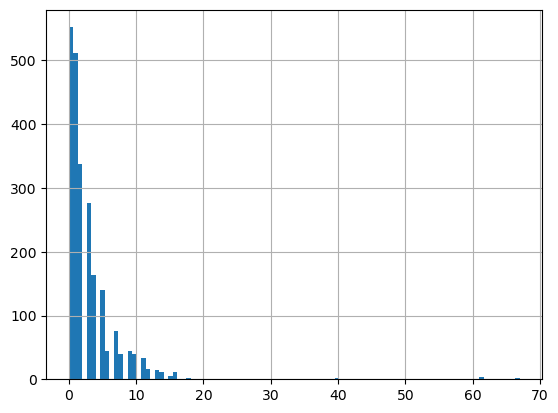

In [242]:
(corrected_liver_eqtl <= 0.05).sum(axis = 1).hist(bins=100)

plt.show()

In [223]:
NUM_SIMULATIONS = 500
NUM_SAMPLES = 10

sim_results = []


for i in range(NUM_SIMULATIONS):
    
    res = sample_qtl_and_subset_eqtls(qtl, 
                                      corrected_hypo_eqtl,
                                      corrected_liver_eqtl,
                                      SAMPLING_SIZE=NUM_SAMPLES)
    
    hypo_eqtl_sig = (res[0] <= 0.05).sum().sum()
    liver_eqtl_sig = (res[1] <= 0.05).sum().sum()
    
    sim_results.append((hypo_eqtl_sig, liver_eqtl_sig))





    
    

,eqtl_sig_num,liver_sig_num
count,500.000000,500.000000
mean,27.972000,29.150000
std,14.316044,15.427492
min,4.000000,5.000000
25%,18.000000,19.750000
50%,25.000000,27.000000
75%,36.000000,35.000000
max,97.000000,134.000000


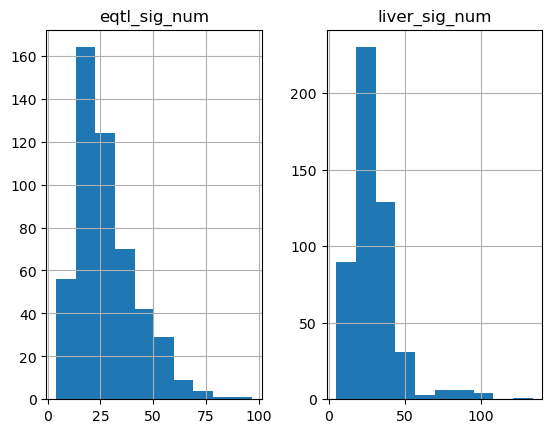

eqtl_sig_num     56.0
liver_sig_num    51.0
dtype: float64

In [227]:
dist = pd.DataFrame(data=sim_results, columns=['eqtl_sig_num', 'liver_sig_num'])
display(dist.describe())

dist.hist()
plt.show()

dist.apply(lambda col: col.quantile(.95))

In [ ]:
eqtl

In [213]:
# Repeat the same analysis only with correcting for fdr post filteration

sim_results = []


for i in range(NUM_SIMULATIONS):
    
    res = sample_qtl_and_subset_eqtls(qtl, 
                                      corrected_hypo_eqtl,
                                      corrected_liver_eqtl,
                                      SAMPLING_SIZE=NUM_SAMPLES)
    
    hypo_eqtl_sig = (res[0] <= 0.05).sum().sum()
    liver_eqtl_sig = (res[1] <= 0.05).sum().sum()
    
    sim_results.append((hypo_eqtl_sig, liver_eqtl_sig))





    
    

cols,10360415,10360418,10360454,10360460,10360479,10360504,10360538,10360540,10360542,10360580,...,10360205,10360235,10360248,10360297,10360315,10360321,10360344,10360391,10360410,10360412
rs6280864,0.998769,0.961604,0.973093,0.985229,0.978174,0.941029,0.988589,0.997104,0.991533,0.772037,...,0.968583,0.925966,0.969543,0.993981,0.983541,0.994391,0.989322,0.909181,0.993116,0.922343
rs13483194,0.974242,0.978993,0.981069,0.994461,0.953650,0.953869,0.998751,0.985768,0.989827,0.979487,...,0.966162,0.980001,0.967398,0.975119,0.996009,0.992595,0.852218,0.982246,0.987031,0.909976
D11Mit231,0.966467,0.998259,0.993791,0.990128,0.984788,0.981827,0.997701,0.983320,0.971081,0.987055,...,0.999313,0.991509,0.964380,0.985439,0.984755,0.929362,0.991435,0.994233,0.965352,0.994984
gnfX.023.543,0.988512,0.988296,0.971978,0.995462,0.996325,0.994052,0.995104,1.000000,0.987867,0.990198,...,0.987641,0.978096,0.992826,0.991305,0.977962,0.986238,0.981784,0.993794,0.965344,0.973776
rs3662820,0.995030,0.987510,0.998788,0.901205,0.988285,0.993930,0.993348,0.981965,0.998000,0.969872,...,0.999043,0.998781,0.986084,0.988458,0.990118,0.994535,0.999965,0.998735,0.999948,0.973941
rs13481041,0.135665,0.976756,0.505232,0.763942,0.953400,0.909379,0.998594,0.991068,0.537446,0.952786,...,0.998949,0.946986,0.960088,0.614357,0.998373,0.761162,0.978270,0.995812,0.991046,0.992191
gnf18.012.857,0.834187,0.981065,0.912036,0.972461,0.971510,0.889041,0.983386,0.989796,0.929252,0.964716,...,0.881489,0.987658,0.940608,0.844069,0.975632,0.983926,0.780137,0.969573,0.973363,0.999684
rs3686516,0.984256,0.983145,0.988811,0.998297,0.999139,0.994954,0.997889,0.960665,0.999620,0.906843,...,0.961393,0.956683,0.947792,0.986295,0.932761,0.958103,0.996802,0.994068,0.997546,0.991666
rs3718618,0.984295,0.962469,0.988698,0.983594,0.938839,0.936709,0.999819,0.992159,0.979639,0.987100,...,0.989447,0.999210,0.992400,0.983425,0.931283,0.947468,0.999836,0.990227,0.998472,0.986744
rs13479811,0.979485,0.977100,0.992781,0.998436,0.967033,0.953025,0.866069,0.986863,0.964279,0.997429,...,0.964778,0.977786,0.854257,0.991442,0.898482,0.959851,0.981567,0.956365,0.943645,0.946506


In [214]:
pd.DataFrame(sim_results).describe()
# for row in sig_rows:
#     print(row)

,0,1
count,100.000000,100.000000
mean,28.060000,30.910000
std,12.602565,14.728585
min,9.000000,10.000000
25%,18.000000,22.000000
50%,25.000000,27.500000
75%,36.250000,37.000000
max,66.000000,89.000000


In [9]:
# QTL - Which of them is significant

qtl_fdr = pd.read_csv('/Users/d_private/_git/system_genetics/data/QTL_results_corrected_df.csv', index_col = 0)
qtl_fdr

,"Blood chemistry, cardiovascular system: Hematocrit of 14-week old males [%]","Blood chemistry, cardiovascular system: Hemoglobin of 14-week old males [g/dl]","Blood chemistry, cardiovascular system: Mean cell hemoglobin concentration of 14-week old males [g/dl]","Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]","Blood chemistry, cardiovascular system: Mean corpuscular hemoglobin of 14-week old males [pg]","Blood chemistry, cardiovascular system: Platelet count of 14-week old males [x10^3/ul]","Blood chemistry, cardiovascular system: Red blood cell count of 14-week old males [x10^6/ul]","Blood chemistry, cardiovascular system: White blood cell count of 14-week old males [x10^3/ul]","Blood chemistry, metabolism: Cholesterol (total) in serum of 14-week old males [mM]","Blood chemistry, metabolism: Glucose after 4 hour fast of 14-week old males [mMl]",...,"Ethanol response (2.25 g/kg ip), blood ethanol concentration (BEC) for males [mg/dl XX min after injection]","Immune function, blood: Peripheral blood lymphocytes, CD4+/CD8+ T cell ratio, males at 3-5 month [ratio]","Metabolism, blood chemistry, nutrition: Plasma iron of 120-day-old males fed 3 ppm iron (Fe) diet [ug/dL]",Metabolism: Blood glucose level (intraperitoneal glucose tolerance test) at time=0 min of 18-week old males [mg/dl],Metabolism: Blood glucose level (intraperitoneal glucose tolerance test) at time=120 min of 18-week old males [mg/dl],Metabolism: Blood glucose level (intraperitoneal glucose tolerance test) at time=15 min of 18-week old males [mg/dl],Metabolism: Blood glucose level (intraperitoneal glucose tolerance test) at time=30 min of 18-week old males [mg/dl],Metabolism: Blood glucose level (intraperitoneal glucose tolerance test) at time=60 min of 18-week old males [mg/dl],"Metabolism: Blood glucose level (intraperitoneal glucose tolerance test), area under curve (AUC) of 18-week old males [mg/dl]","Metabolism: Blood glucose response, area under the curve for males [AUC]"
Locus,,,,,,,,,,,,,,,,,,,,,
CEL-10_113177617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.996406,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEL-10_119602638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEL-10_14286032,0.996406,0.996406,0.996406,0.998265,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,...,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406
CEL-10_46671493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.996406,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEL-10_48369850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs8273308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs8274734,0.999446,0.998233,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,...,NaN,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406,0.996406
rs8275764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.996406,0.996406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
liver_eqtl

!Sample_title,A_51_P100599,A_51_P101545,A_51_P102225,A_51_P102507,A_51_P102782,A_51_P103107,A_51_P103929,A_51_P104718,A_51_P104786,A_51_P105408,...,A_51_P515446,A_51_P515585,A_51_P515623,A_51_P516006,A_51_P517127,A_51_P517245,A_51_P517388,A_51_P517430,A_51_P518576,A_51_P519390
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,0.961926,0.952606,0.997966,0.991035,0.706962,0.988497,0.983157,0.951268,0.965010,0.965789,...,0.990238,0.853230,0.947838,0.906141,0.979465,0.910324,0.967841,0.952251,0.932676,0.966038
rs6376963,0.974502,0.970340,0.988694,0.990038,0.768344,0.991611,0.958963,0.956183,0.982220,0.961681,...,0.982692,0.869719,0.928702,0.903605,0.958954,0.885835,0.976530,0.978518,0.953414,0.988091
rs3677817,0.974502,0.970340,0.988694,0.990038,0.768344,0.991611,0.958963,0.956183,0.982220,0.961681,...,0.982692,0.869719,0.928702,0.903605,0.958954,0.885835,0.976530,0.978518,0.953414,0.988091
rs8236463,0.971947,0.987696,0.999276,0.933591,0.839881,0.972423,0.942835,0.918209,0.992861,0.966412,...,0.968051,0.890440,0.942411,0.952196,0.947876,0.904547,0.998819,0.968244,0.956936,0.938170
rs6298633,0.971947,0.987696,0.999276,0.933591,0.839881,0.972423,0.942835,0.918209,0.992861,0.966412,...,0.968051,0.890440,0.942411,0.952196,0.947876,0.904547,0.998819,0.968244,0.956936,0.938170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154048891,0.916184,0.960644,0.926713,0.991446,0.970998,0.946721,0.944750,0.940905,0.910286,0.940718,...,0.984881,0.967721,0.996635,0.993842,0.970791,0.884341,0.999580,0.916963,0.991842,0.953217
CEL-X_154259201,0.910517,0.952326,0.909305,0.995109,0.935108,0.969297,0.931272,0.939773,0.927332,0.954104,...,0.986588,0.931524,0.963251,0.984337,0.989254,0.895702,0.996561,0.916945,0.975181,0.927830
rs3657281,0.953221,0.927764,0.925240,0.965455,0.955517,0.951143,0.947057,0.943577,0.972607,0.952308,...,0.990648,0.946853,0.956429,0.991046,0.985364,0.869608,0.987291,0.884164,0.975146,0.906975


In [256]:
g = pd.read_csv('/Users/d_private/_git/system_genetics/data/genotypes_preproc_numeric_df.csv', index_col = 0 )
# g.loc[['rs6298633', 'rs8236463'], :]
(g.loc['rs6298633',:] != 1).eq((g.loc['rs8236463',:]) != 1).sum()

88

In [250]:
g.loc['rs6298633',:].shape

(89,)

In [254]:
(g.loc['rs6298633',:] == 1).sum()

4

In [261]:
pd.read_csv('/Users/d_private/_git/system_genetics/data/QTL_results_not_corrected_df.csv', index_col = 0 )

,Blood glucose levels preinjection with 4g/kg of ethanol in males [mg/dl],Blood glucose levels postinjection (120 min) with 4g/kg of ethanol in males [mg/dl],Blood glucose levels preinjection with saline in males [mg/dl],Blood glucose levels postinjection (120 min) with saline in males [mg/dl],"Blood chemistry, metabolism: Iron binding capacity (systemic, total iron-binding capacity, TIBC, transferrin level) of males [ug/dL]",Cardiovascular system: Systolic blood pressure of adult males raised in Memphis measured using a tail cuff system [mm Hg],"Metabolism: Blood glucose response, area under the curve for males [AUC]","Ethanol response (2.25 g/kg ip), blood ethanol concentration (BEC) for males [mg/dl XX min after injection]",Cardiovascular system: Hematocrit of 120-day-old males fed 3 parts per million iron (ppm Fe) diet [% packed red blood cells],Cardiovascular system: Hematocrit of 120-day-old males fed 270 parts per million iron (ppm Fe) diet [% packed red blood cells],...,"Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]",Blood chemistry: Sodium of 14-week old males [mM],Blood chemistry: Phosphorus of 14-week old males [mM],"Blood chemistry, cardiovascular system: Platelet count of 14-week old males [x10^3/ul]","Blood chemistry, cardiovascular system: Red blood cell count of 14-week old males [x10^6/ul]","Blood chemistry, metabolism: Cholesterol (total) in serum of 14-week old males [mM]",Blood chemistry: Triglyceride of 14-week old males [mM],Blood chemistry: Blood proteins (total) of 14-week old males [g/l],Blood chemistry: Urea of 14-week old males [mM],"Blood chemistry, cardiovascular system: White blood cell count of 14-week old males [x10^3/ul]"
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,0.799392,0.450537,0.867788,0.997226,0.589828,NaN,NaN,NaN,0.280472,0.797792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs6376963,0.799392,0.450537,0.867788,0.997226,0.589828,NaN,NaN,NaN,0.280472,0.797792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs3677817,0.799392,0.450537,0.867788,0.997226,0.589828,NaN,NaN,NaN,0.280472,0.797792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs8236463,0.932727,0.609847,0.832120,0.748146,0.823064,NaN,NaN,NaN,0.276012,0.689955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs6298633,0.932727,0.609847,0.832120,0.748146,0.823064,NaN,NaN,NaN,0.276012,0.689955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154048891,0.115437,0.167958,0.136101,0.162732,0.468001,NaN,NaN,NaN,0.009518,0.846900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEL-X_154259201,0.344119,0.203650,0.372790,0.359901,0.593765,NaN,NaN,NaN,0.064841,0.944029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs3657281,0.269669,0.193010,0.410022,0.825779,0.512001,NaN,NaN,NaN,0.064841,0.944029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
pd.read_pickle('/Users/d_private/_git/system_genetics/bin/qtl.pkl')

,Blood glucose levels preinjection with 4g/kg of ethanol in males [mg/dl],Blood glucose levels postinjection (120 min) with 4g/kg of ethanol in males [mg/dl],Blood glucose levels preinjection with saline in males [mg/dl],Blood glucose levels postinjection (120 min) with saline in males [mg/dl],"Blood chemistry, metabolism: Iron binding capacity (systemic, total iron-binding capacity, TIBC, transferrin level) of males [ug/dL]",Cardiovascular system: Systolic blood pressure of adult males raised in Memphis measured using a tail cuff system [mm Hg],"Metabolism: Blood glucose response, area under the curve for males [AUC]","Ethanol response (2.25 g/kg ip), blood ethanol concentration (BEC) for males [mg/dl XX min after injection]",Cardiovascular system: Hematocrit of 120-day-old males fed 3 parts per million iron (ppm Fe) diet [% packed red blood cells],Cardiovascular system: Hematocrit of 120-day-old males fed 270 parts per million iron (ppm Fe) diet [% packed red blood cells],...,"Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]",Blood chemistry: Sodium of 14-week old males [mM],Blood chemistry: Phosphorus of 14-week old males [mM],"Blood chemistry, cardiovascular system: Platelet count of 14-week old males [x10^3/ul]","Blood chemistry, cardiovascular system: Red blood cell count of 14-week old males [x10^6/ul]","Blood chemistry, metabolism: Cholesterol (total) in serum of 14-week old males [mM]",Blood chemistry: Triglyceride of 14-week old males [mM],Blood chemistry: Blood proteins (total) of 14-week old males [g/l],Blood chemistry: Urea of 14-week old males [mM],"Blood chemistry, cardiovascular system: White blood cell count of 14-week old males [x10^3/ul]"
rs6269442,0.799392,0.450537,0.867788,0.997226,0.589828,0.765162,0.874316,0.392848,0.280472,0.797792,...,0.647726,0.124173,0.298459,0.509072,0.756154,0.716479,0.973481,0.403677,0.298254,0.361171
rs6376963,0.799392,0.450537,0.867788,0.997226,0.589828,0.388619,0.685919,0.810470,0.280472,0.797792,...,0.375185,0.124173,0.193828,0.686806,0.926010,0.233281,0.860241,0.191307,0.582265,0.442948
rs3677817,0.799392,0.450537,0.867788,0.997226,0.589828,0.293640,0.518323,0.812258,0.280472,0.797792,...,0.367112,0.124173,0.193828,0.839908,0.972376,0.258424,0.752643,0.191307,0.582265,0.438159
rs8236463,0.932727,0.609847,0.832120,0.748146,0.823064,0.761536,0.252723,0.958978,0.276012,0.689955,...,0.710033,0.073283,0.608629,0.671582,0.871667,0.068018,0.640750,0.034830,0.505374,0.680052
rs6298633,0.932727,0.609847,0.832120,0.748146,0.823064,0.761536,0.252723,0.990975,0.276012,0.689955,...,0.710033,0.073283,0.608629,0.671582,0.871667,0.068018,0.640750,0.034830,0.505374,0.680052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154048891,0.115437,0.167958,0.136101,0.162732,0.468001,0.699896,0.386280,0.685081,0.009518,0.846900,...,0.282989,0.062953,0.672638,0.441221,0.485735,0.949867,0.645932,0.083369,0.896439,0.742664
CEL-X_154259201,0.344119,0.203650,0.372790,0.359901,0.593765,0.916630,0.993978,0.837266,0.064841,0.944029,...,0.622624,0.084214,0.652934,0.511974,0.366635,0.592494,0.262791,0.405990,0.926227,0.703349
rs3657281,0.269669,0.193010,0.410022,0.825779,0.512001,0.916630,0.993978,0.837266,0.064841,0.944029,...,0.622624,0.084214,0.652934,0.511974,0.366635,0.592494,0.262791,0.405990,0.926227,0.703349
gnfX.146.867,0.269669,0.193010,0.410022,0.825779,0.512001,0.619786,0.386177,0.747835,0.064841,0.944029,...,0.842354,0.065458,0.565216,0.227665,0.873040,0.523954,0.813474,0.361189,0.945353,0.493772


In [264]:
g.loc['rs6269442',:] == 1

6

In [351]:
g = pd.read_csv('/Users/d_private/_git/system_genetics/data/genotypes_preproc_numeric_df.csv', index_col = 0 )
pheno = pd.read_csv('/Users/d_private/_git/system_genetics/data/phenotypes_filtered_df.csv', index_col = 0 )
y = pheno.loc['Cardiovascular system: Systolic blood pressure of adult males raised in Memphis measured using a tail cuff system [mm Hg]', :]

In [352]:
mask = g != 1
genotypes_homozygous = g[mask]

In [353]:

common = genotypes_homozygous.columns.intersection(y.dropna().index)

In [362]:
_y = y[common]
_X = genotypes_homozygous[common]
_X = _X.astype(float)


In [376]:
from scipy.stats import stats

def regress(x, y):
    x = x.dropna()
    common = x.index.intersection(y.dropna().index)
    y = y[common]
    return stats.linregress(x, y)
    

    
    
reg_models = _X.apply(lambda x: regress(x, y), axis = 1)
# reg_models = _X.apply(lambda x: stats.linregress(x.dropna(), _y.x), axis=1)


In [347]:
genotypes_homozygous.index

Index(['rs6269442', 'rs6376963', 'rs3677817', 'rs8236463', 'rs6298633',
       'rs6360236', 'D1Mit1', 'D1Mit294', 'rs3655978', 'rs3669485',
       ...
       'DXMit10', 'CEL-X_143438541', 'CEL-X_143595976', 'rs13484097',
       'gnfX.141.820', 'CEL-X_154048891', 'CEL-X_154259201', 'rs3657281',
       'gnfX.146.867', 'DXMit223'],
      dtype='object', name='Locus', length=2327)

In [378]:
qtl = pd.read_csv('./data/temp_qtl.csv', index_col=0)

In [385]:
qtl_fdr = qtl.copy()
multiple_test_correction(qtl_fdr)

is_significant = qtl_fdr <= 0.05

reduced_qtl = qtl_fdr[is_significant].dropna(axis = 1, how='all').dropna(axis = 0, how='all')
num_significant_qtls = reduced_qtl.notna().sum().sum()

print(f"After filtering non significant QTLs in the FDR-corrected data, {num_significant_qtls} snp-traits remain significant.")
display(reduced_qtl)

After filtering non significant QTLs in the FDR-corrected data, 9 snp-traits remain significant.


,Blood chemistry: Alkaline phosphatase of 14-week old males (ALPL gene product) [U/l],"Blood chemistry, cardiovascular system: Hematocrit of 14-week old males [%]","Blood chemistry, cardiovascular system: Mean cell volume of 14-week old males [fl]"
Locus,,,
CEL-4_130248229,0.006197,NaN,NaN
rs13478002,0.014834,NaN,NaN
rs3686214,0.028610,NaN,NaN
rs6386918,0.028610,NaN,NaN
rs13479441,NaN,NaN,0.024550
rs13479451,NaN,0.006197,0.014834
rs3724540,NaN,0.006197,0.014834


In [387]:
eqtl_dist_df = pd.read_csv('/Users/d_private/_git/system_genetics/data/eqtl_dist_dist.csv', index_col = 0)
eqtl_dist_df.describe()

,hypo_eqtl_sig,liver_eqtl_sig
count,500.000000,500.00000
mean,20.016000,20.87800
std,11.144692,13.14796
min,2.000000,3.00000
25%,12.000000,13.00000
50%,18.000000,18.00000
75%,25.000000,25.00000
max,64.000000,113.00000


In [390]:
eqtl_dist_df.quantile(.95)

hypo_eqtl_sig     42.05
liver_eqtl_sig    39.05
Name: 0.95, dtype: float64

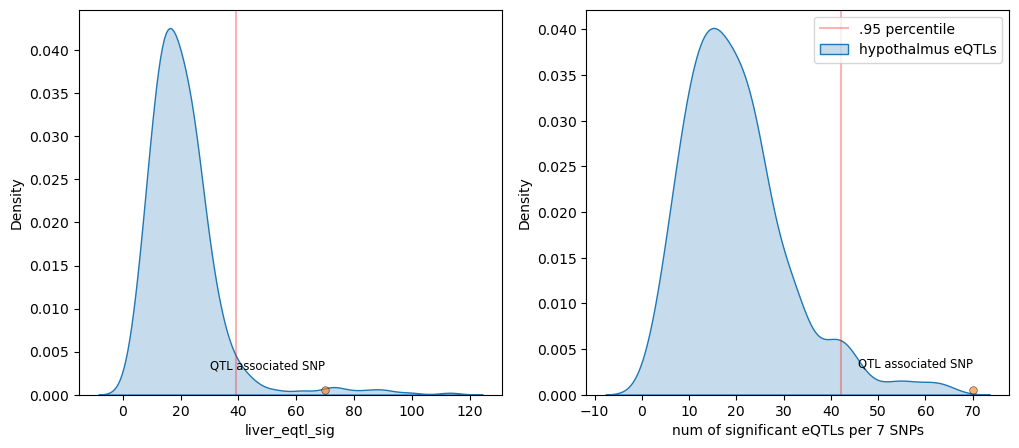

In [487]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(eqtl_dist_df.liver_eqtl_sig, fill=True, ax = ax1)
ax1.axvline(eqtl_dist_df.liver_eqtl_sig.quantile(.95), color='red', alpha=0.3)
ax1.text(70, 0.003, "QTL associated SNP", horizontalalignment='right', size='small', color='black',)
ax1.scatter(70, 0.0005, marker='o', s=30, edgecolors='black', alpha=.6, linewidths=0.5)


sns.kdeplot(eqtl_dist_df.hypo_eqtl_sig, fill=True, label = 'eQTLs distribution ', ax = ax2)
ax2.axvline(eqtl_dist_df.hypo_eqtl_sig.quantile(.95), color='red', alpha=0.3, label='.95 percentile')
ax2.text(70, 0.003, "QTL associated SNP", horizontalalignment='right', size='small', color='black')
ax2.scatter(70, 0.0005, marker='o', s=30, edgecolors='black', alpha=.6, linewidths=0.5)
ax2.set_xlabel('num of significant eQTLs per 7 SNPs')
plt.title('')
plt.legend(loc='upper right')
plt.show()

In [417]:
x

[42.049999999999955, 42.049999999999955]